In [1]:
# please don't juge the code in this file, it was 4am and I was tired
import json
import os

output_dir = "output/report_output/2_agents/"
# get the path of each folder in the output folder
folders = os.listdir(output_dir)
# get the json files in each folder
data_simple = {}
for folder in folders:
    # list each file that ends with .json
    if "interm" in folder:
        continue
    try:
        files = os.listdir(output_dir + folder)
    except Exception as e:
        print(e)
    files = [file for file in files if file.endswith('.json')]
    print(files)
    try:
        with open(output_dir + folder + '/' + 'config.json') as f:
            json_data = json.load(f)
            try:
                print(json_data['filename'], folder)
            except:
                continue
                # remove the folder from the data
    except:
        continue
    
    data_simple[folder] = {}
    for file in files:
        with open(output_dir + folder + '/' + file) as f:
            json_data = json.load(f)
            data_simple[folder][file] = json_data




['config.json', 'result.json', 'history.json']
envs/2-agents/simple/2-agents-3vsmistral.json A_gpt-3.5-turbo_D_Mistral_simple_20231001_200633
['config.json', 'result.json', 'history.json']
envs/2-agents/hard/2-agents-mistralvsmistral.json A_Mistral_D_Mistral_hard_20231001_234555
['config.json', 'result.json', 'history.json']
envs/2-agents/simple/2-agents-mistralvsmistral.json A_Mistral_D_Mistral_simple_20231001_233833
['config.json', 'result.json', 'history.json']
envs/2-agents/hard/2-agents-mistralvsmistral.json A_Mistral_D_Mistral_hard_20231001_234645
['config.json', 'result.json', 'history.json']
envs/2-agents/hard/2-agents-3vs4.json A_gpt-3.5-turbo_D_gpt-4_hard_20231002_011911
['config.json', 'result.json', 'history.json']
envs/2-agents/simple/2-agents-3vs4.json A_gpt-3.5-turbo_D_gpt-4_simple_20231002_013815
['config.json', 'result.json', 'history.json']
envs/2-agents/hard/2-agents-3vs3.json A_gpt-3.5-turbo_D_gpt-3.5-turbo_hard_20231001_213935
['config.json', 'result.json', 'histor

In [2]:
print(len(data_simple))
plot_data = {}

for run in data_simple:
    filename = str(data_simple[run]['config.json']['filename'])
    players = data_simple[run]['config.json']['players']
    if filename not in plot_data:
        plot_data[filename] = []
    try:
        plot_data[filename].append(str(data_simple[run]['result.json']['solved']))
    except:
        pass
# get the statistics for each backend vs. backend
print(plot_data)

193
{'envs/2-agents/simple/2-agents-3vsmistral.json': ['True', 'False', 'False', 'True', 'False', 'False', 'False', 'False', 'True', 'False', 'False', 'False', 'False'], 'envs/2-agents/hard/2-agents-mistralvsmistral.json': ['False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False'], 'envs/2-agents/simple/2-agents-mistralvsmistral.json': ['False', 'False', 'False', 'False', 'True', 'False', 'False', 'False', 'False', 'True', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False'], 'envs/2-agents/hard/2-agents-3vs4.json': ['False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False'], 'envs/2-agents/simple/2-agents-3vs4.json': ['False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False'], 'envs/2-agents/hard/2-agents-3vs3.json': ['False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False'], 'envs/2-agents/hard/2-agents-mistralvs4.json': ['False', 'False', '

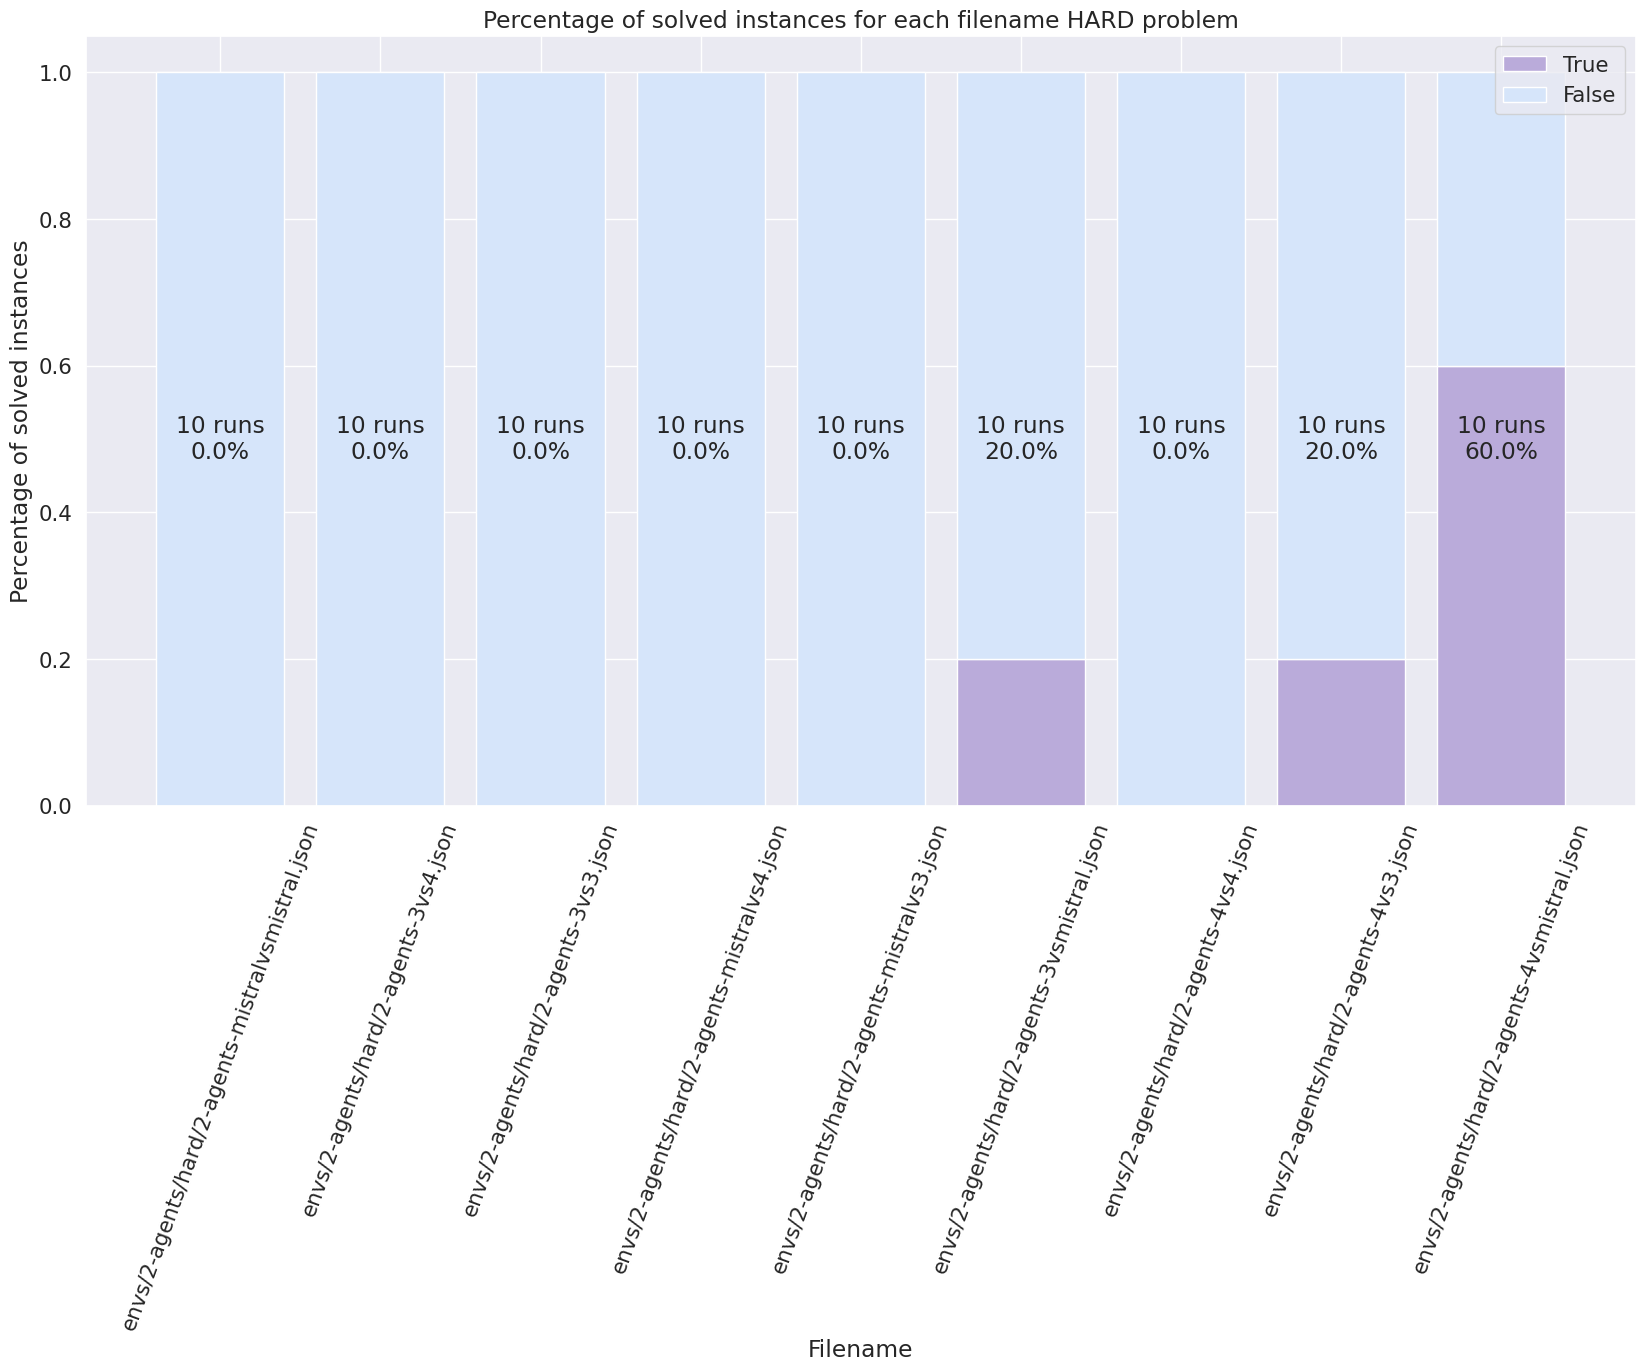

In [58]:
# plot the data for each filename
import matplotlib.pyplot as plt

# plot the percentage of true and false for each filename
plt.figure(figsize=(20, 10))
plt.title('Percentage of solved instances for each filename HARD problem')
plt.xlabel('Filename')
plt.ylabel('Percentage of solved instances')
for filename in plot_data:
    if "simple" in filename:
        continue
    true = plot_data[filename].count('True')
    false = plot_data[filename].count('False')
    plt.bar(filename, true / (true + false), color='#BAABDA')
    plt.bar(filename, false / (true + false), bottom=true / (true + false), color='#D6E5FA')
    # add total number of instances
    true_percentage = round(true / (true + false) * 100, 2)
    plt.text(filename, 0.5, str(true + false) +' runs\n'+str(true_percentage)+'%', ha='center', va='center')
# rotate the xticks
plt.xticks(rotation=70)
plt.legend(['True', 'False'])
plt.show()

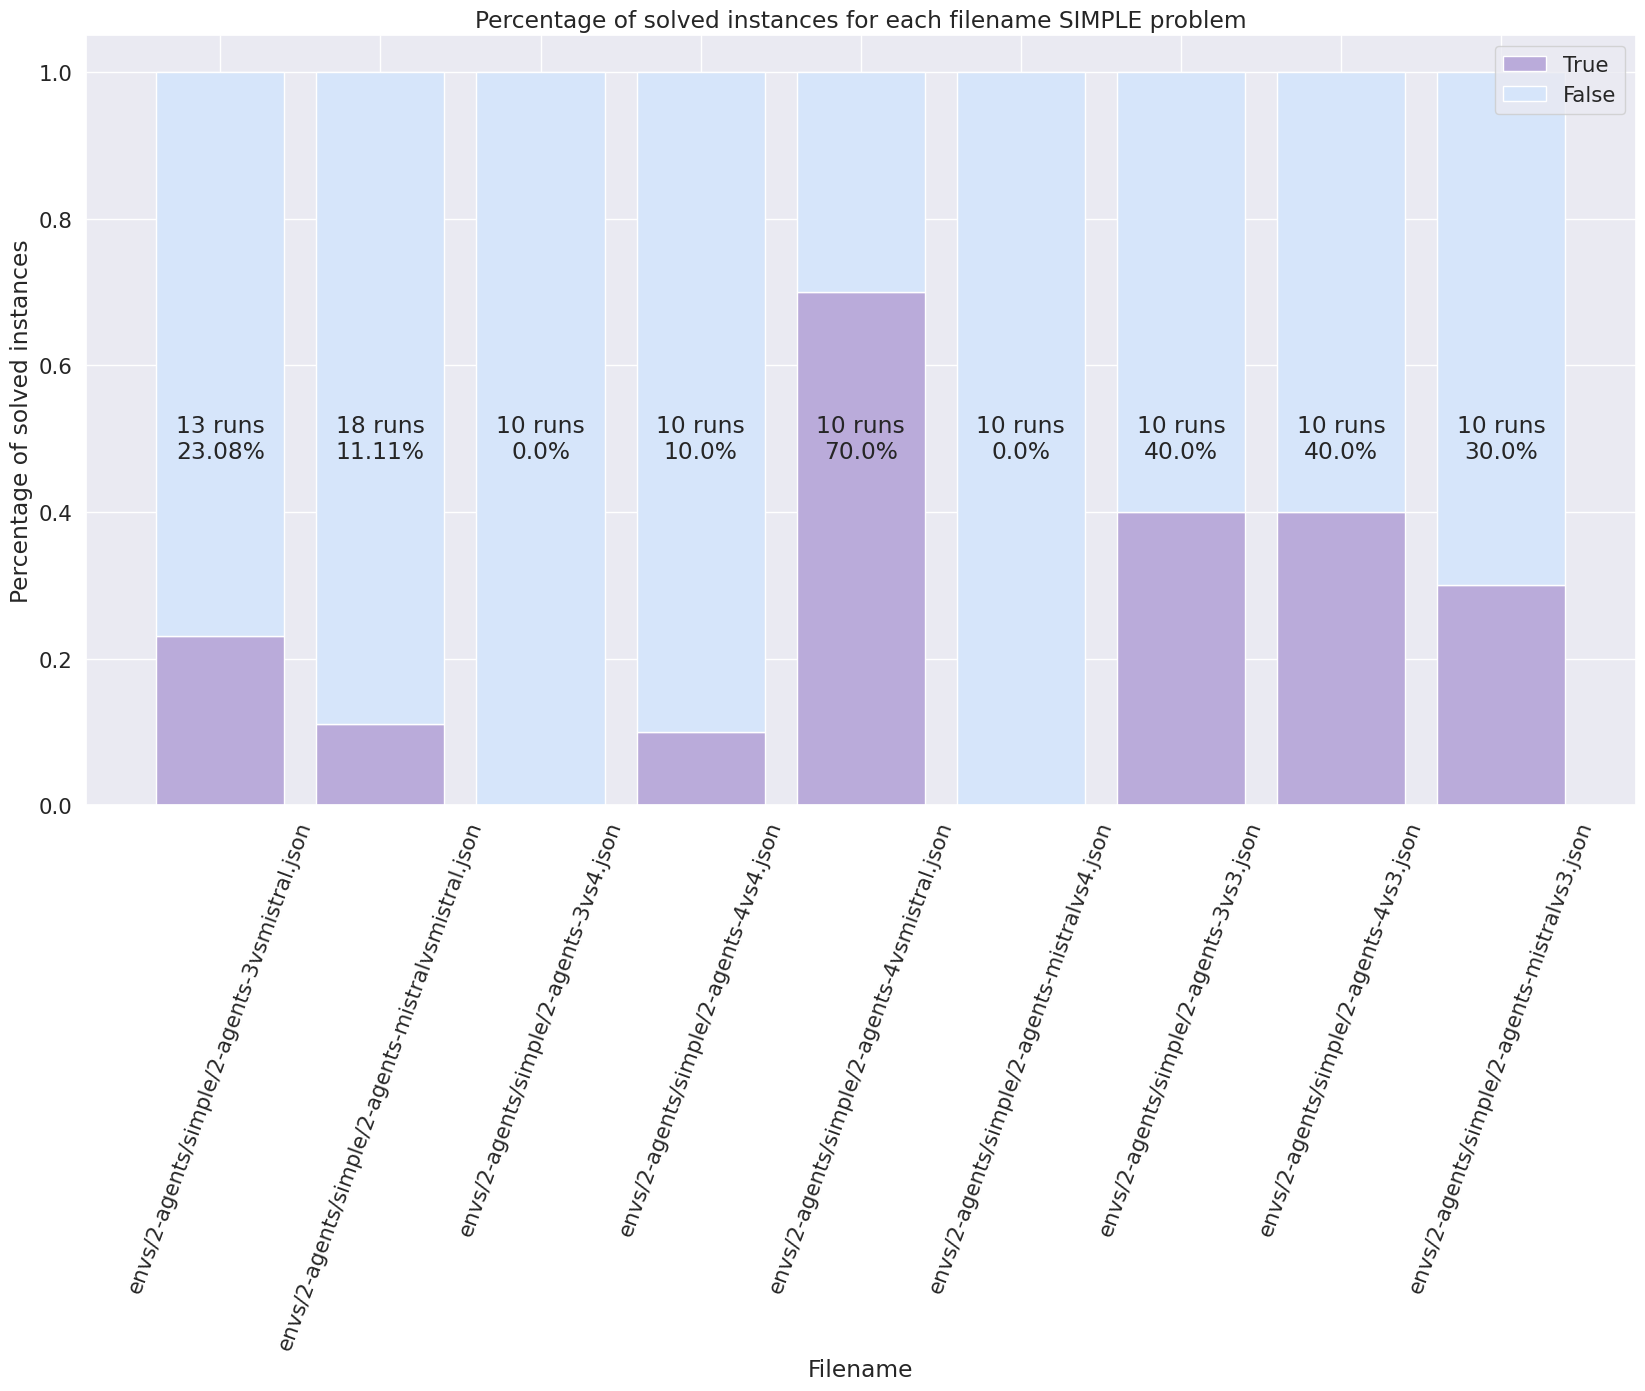

In [59]:
# plot the data for each filename
import matplotlib.pyplot as plt

# plot the percentage of true and false for each filename
plt.figure(figsize=(20, 10))
plt.title('Percentage of solved instances for each filename SIMPLE problem')
plt.xlabel('Filename')
plt.ylabel('Percentage of solved instances')
for filename in plot_data:
    if "hard" in filename:
        continue
    true = plot_data[filename].count('True')
    false = plot_data[filename].count('False')
    plt.bar(filename, true / (true + false), color='#BAABDA')
    plt.bar(filename, false / (true + false), bottom=true / (true + false), color='#D6E5FA')
    # add total number of instances
    true_percentage = round(true / (true + false) * 100, 2)
    plt.text(filename, 0.5, str(true + false) +' runs\n'+str(true_percentage)+'%', ha='center', va='center')
# rotate the xticks
plt.xticks(rotation=70)
plt.legend(['True', 'False'])
plt.show()

['/2-agents/hard/2-agents-mistral', 'mistral.json']
['/2-agents/hard/2-agents-3', '4.json']
['/2-agents/hard/2-agents-3', '3.json']
['/2-agents/hard/2-agents-mistral', '4.json']
['/2-agents/hard/2-agents-mistral', '3.json']
['/2-agents/hard/2-agents-3', 'mistral.json']
['/2-agents/hard/2-agents-4', '4.json']
['/2-agents/hard/2-agents-4', '3.json']
['/2-agents/hard/2-agents-4', 'mistral.json']


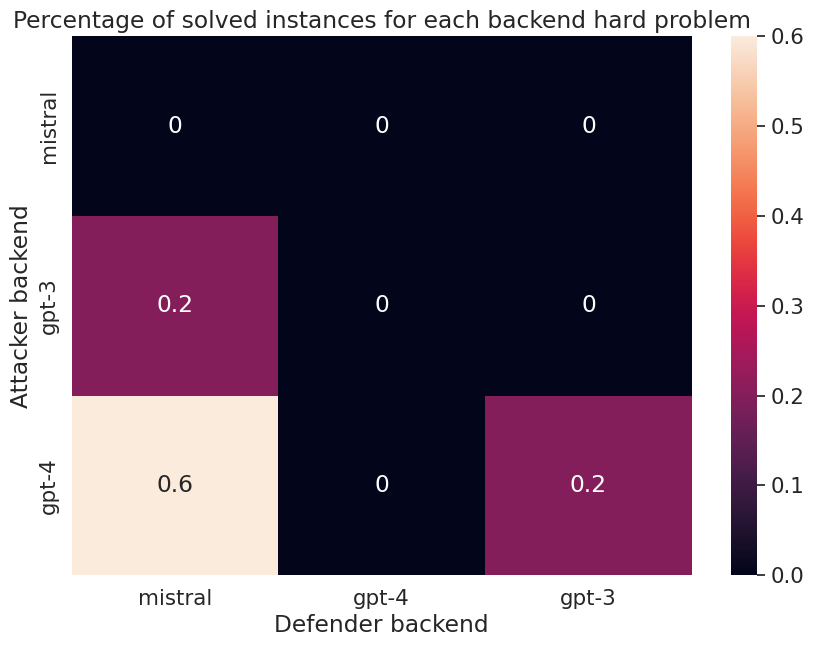

['/2-agents/simple/2-agents-3', 'mistral.json']
['/2-agents/simple/2-agents-mistral', 'mistral.json']
['/2-agents/simple/2-agents-3', '4.json']
['/2-agents/simple/2-agents-4', '4.json']
['/2-agents/simple/2-agents-4', 'mistral.json']
['/2-agents/simple/2-agents-mistral', '4.json']
['/2-agents/simple/2-agents-3', '3.json']
['/2-agents/simple/2-agents-4', '3.json']
['/2-agents/simple/2-agents-mistral', '3.json']


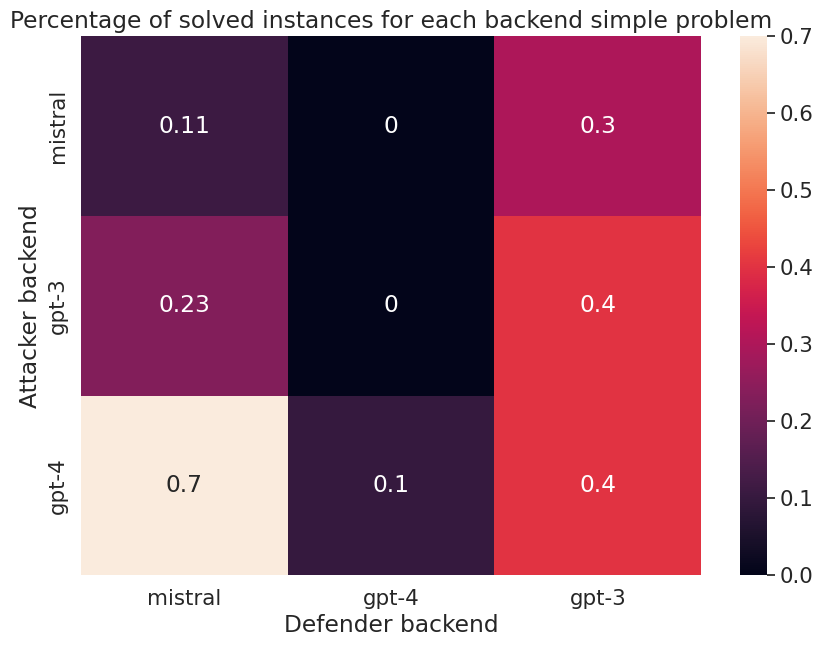

In [60]:
# plot everything in a confusion matrix
import numpy as np
types= ["simple", "hard"]
for type in ["simple", "hard"]:
    # get the data for each filename
    # possbiel backends "4", "3", "mistral"
    data_simple = {}
    for key in plot_data:
        if type in key:
            continue
        splitted_key = key[4:].split("vs")
        attacker_backend = ""
        print(splitted_key)
        if "4" in splitted_key[0]:
            attacker_backend = "gpt-4"
        elif "3" in splitted_key[0]:
            attacker_backend = "gpt-3"
        elif "mistral" in splitted_key[0]:
            attacker_backend = "mistral"
        defender_backend = ""
        if "4" in splitted_key[1]:
            defender_backend = "gpt-4"
        elif "3" in splitted_key[1]:
            defender_backend = "gpt-3"
        elif "mistral" in splitted_key[1]:
            defender_backend = "mistral"
        else:
            print("ERROR")
        if defender_backend not in data_simple:
            data_simple[defender_backend] = {}
        data_simple[defender_backend][attacker_backend] = plot_data[key].count('True') / (plot_data[key].count('True') + plot_data[key].count('False'))

    # get the data for each backend

    # plot the data in a confusion matrix
    import seaborn as sn
    import pandas as pd

    df_cm = pd.DataFrame(data_simple, index = ["mistral", "gpt-3", "gpt-4"])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)
    plt.title("Percentage of solved instances for each backend " + [i for i in types if i is not type][0] + " problem")
    plt.xlabel("Defender backend")
    plt.ylabel("Attacker backend")
    plt.show()




